<h1><center> Research Methods for Quantitative Professionals </center></h1>

<h2><center> Historical Performance of Assets in Regimes </center></h2>

## Libraries:

In [1]:

## Libraries:import pandas as pd
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from openpyxl import load_workbook 
import seaborn as sns
import warnings 
from IPython.display import Image
from statistics import mean 

from dfply import *

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image , display, Javascript
# from IPython.html.widgets import interact, SelectWidget, CheckboxWidget, RadioButtonsWidget, SelectMultiple
from __future__ import print_function

from ipywidgets.widgets import (interact, interactive, interactive_output, fixed, ToggleButtons,
interact_manual, SelectMultiple, Output, RadioButtons,IntSlider, Dropdown, Layout, Select, HBox, VBox, Checkbox, Button)
#import ipywidgets as widgets

from traitlets import link , dlink

import asyncio
import re


from plotly import plotly


import itertools

from decimal import Decimal

from colour import Color

import mpld3


from hpie import HPie, stringvalues_to_pv

from scipy.optimize import minimize

## Setting the size of the output window:

In [81]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;  /* your desired max-height here */
    max-width: 5000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

## Function to store values from the widgets:

In [3]:
%gui asyncio

def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        # make the new value available
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    temp = future
    return future

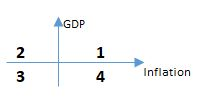

In [4]:
Image(filename='quad.jpg')

## Define a custom color map function:

In [5]:
def my_color_map(val):
    if type(val) == str:
        val = re.sub(r'%', ' ', val) # Remove '%', if any
        color = 'red' if int(val) <= 0 else 'green'
    else:
        color = 'red' if val <= 0 else 'green'
    return 'color: %s' % color

# display(avg_table.style.background_gradient( cmap = "coolwarm_r" , axis = 0 ))

# Collecting Data from excel and trimming it based on the requirement

In [6]:
df_USD = pd.read_excel("Data.xlsx", header = None,sheet_name = 'USD')
df_gold = pd.read_excel("Data.xlsx", header = None,sheet_name = 'gold')
df_equity = pd.read_excel("Data.xlsx", header = None,sheet_name = 'equity')
df_bonds = pd.read_excel("Data.xlsx", header = None,sheet_name = 'bonds')
df_commodities = pd.read_excel("Data.xlsx", header = None,sheet_name = 'commodities')
df_GDP = pd.read_excel("Data.xlsx", header = None,sheet_name = 'GDP')
df_CPI = pd.read_excel("Data.xlsx", header = None,sheet_name = 'CPI')


df_USD.columns = ['Date','price']
df_gold.columns = ['Date','price']
df_equity.columns = ['Date','price']
df_bonds.columns = ['Date','price']
df_commodities.columns = ['Date','price']
df_GDP.columns = ['Date','return']
df_CPI.columns = ['Date','return']


####   input below --- till what date you want to trim the data?

Last_date_input = "01OCT2015"

date = datetime.datetime.strptime(Last_date_input, "%d%b%Y")

Last_date = date

index_for_Last_date_testing =0


for i in range(len(df_USD)):
    
    
    if df_USD['Date'][i] ==  Last_date:
        
        index_for_Last_date_testing  = i
        
        break
    
    else:
        continue

        
############## Below dataframes are new dateframes created from orginal dataframes which include entrire data
############## Dataframes are trimmed according to the 'Date' inputed above 

df_USD = df_USD.loc[:index_for_Last_date_testing,:]
df_gold = df_gold.loc[:index_for_Last_date_testing,:]
df_equity = df_equity.loc[:index_for_Last_date_testing,:]
df_bonds = df_bonds.loc[:index_for_Last_date_testing,:]
df_commodities = df_commodities.loc[:index_for_Last_date_testing,:]
df_GDP = df_GDP.loc[:index_for_Last_date_testing,:]
df_CPI = df_CPI.loc[:index_for_Last_date_testing,:]


# Splitting data in the above DataFrames -- to study correlation 

In [7]:
# n = 10 # 'n' is number of splits you want in data

# num = [ i+1 for i in range(n) ] 

In [8]:
# for i in num:
    

#     if i != num[-1]:
        
#         vars()['dataUSD' + str(i)] = df_USD.iloc[(i-1)*math.floor(len(df_USD)/n):i*math.floor(len(df_USD)/n)]
#         vars()['datagold' + str(i)] = df_gold.iloc[(i-1)*math.floor(len(df_gold)/n):i*math.floor(len(df_gold)/n)]
#         vars()['dataequity' + str(i)] = df_equity.iloc[(i-1)*math.floor(len(df_equity)/n):i*math.floor(len(df_equity)/n)]
#         vars()['databonds' + str(i)] = df_bonds.iloc[(i-1)*math.floor(len(df_bonds)/n):i*math.floor(len(df_bonds)/n)]
#         vars()['datacommodities' + str(i)] = df_commodities.iloc[(i-1)*math.floor(len(df_commodities)/n):i*math.floor(len(df_commodities)/n)]
#         vars()['dataGDP' + str(i)] = df_GDP.iloc[(i-1)*math.floor(len(df_GDP)/n):i*math.floor(len(df_GDP)/n)] 
#         vars()['dataCPI' + str(i)] = df_CPI.iloc[(i-1)*math.floor(len(df_CPI)/n):i*math.floor(len(df_CPI)/n)] 
        
#     else:
        
#         vars()['dataUSD' + str(i)] = df_USD.iloc[(i-1)*math.floor(len(df_USD)/n):]
#         vars()['datagold' + str(i)] = df_gold.iloc[(i-1)*math.floor(len(df_gold)/n):]
#         vars()['dataequity' + str(i)] = df_equity.iloc[(i-1)*math.floor(len(df_equity)/n):]
#         vars()['databonds' + str(i)] = df_bonds.iloc[(i-1)*math.floor(len(df_bonds)/n):]
#         vars()['datacommodities' + str(i)] = df_commodities.iloc[(i-1)*math.floor(len(df_commodities)/n):]
#         vars()['dataGDP' + str(i)] = df_GDP.iloc[(i-1)*math.floor(len(df_GDP)/n):] 
#         vars()['dataCPI' + str(i)] = df_CPI.iloc[(i-1)*math.floor(len(df_CPI)/n):]
        
    
#     vars()['dataUSD_return' + str(i)] = vars()['dataUSD' + str(i)]['price'].pct_change()
#     vars()['datagold_return' + str(i)] = vars()['datagold' + str(i)]['price'].pct_change()
#     vars()['dataequity_return' + str(i)] = vars()['dataequity' + str(i)]['price'].pct_change()
#     vars()['databonds_return' + str(i)] = -vars()['databonds' + str(i)]['price'].pct_change()
#     vars()['datacommodities_return' + str(i)] = vars()['datacommodities' + str(i)]['price'].pct_change()
#     vars()['dataGDP_return' + str(i)] = vars()['dataGDP' + str(i)]['return'].pct_change()
#     vars()['dataCPI_return' + str(i)] = vars()['dataCPI' + str(i)]['return'].pct_change()
    
    
    
    
#     vars()['AssetClass'+str(i)] = pd.DataFrame()
#     vars()['AssetClass'+str(i)]['Equity'] = vars()['dataequity_return' + str(i)] 
#     vars()['AssetClass'+str(i)]['Bonds'] = vars()['databonds_return' + str(i)]
#     vars()['AssetClass'+str(i)]['USD'] = vars()['dataUSD_return' + str(i)]
#     vars()['AssetClass'+str(i)]['Gold'] = vars()['datagold_return' + str(i)]
#     vars()['AssetClass'+str(i)]['commodities']= vars()['datacommodities_return' + str(i)]
#     vars()['AssetClass'+str(i)]['GDP'] = vars()['dataGDP_return' + str(i)]
#     vars()['AssetClass'+str(i)]['CPI'] = vars()['dataCPI_return' + str(i)]
    
#     vars()['AssetClass'+str(i)].dropna(inplace=True)

#     vars()['AssetCorrmatrix'+str(i)]=vars()['AssetClass'+str(i)].corr()
    


In [9]:
# type 'AssetCorrmatrix2' -- this will give the correlation matrix if we had 2 splits in the data -- 
# if you have 3 splits then type 3 at end

# AssetCorrmatrix2

In [10]:
# ### for example : equity_bond -- this will give the list of correlations between equity and bond --- 
# ### correlation in the list are in order --- first element in the list will give you correlation of all the returns \\\
# ### of bonds and equity that fall into first cluster of data ( after splitting it into 'n' clusters)

# equity_bond = []
# equity_USD = []
# equity_gold = []
# equity_commodities = []
# bonds_USD = []
# bonds_gold =[]
# bonds_commodities = []
# USD_gold =[]
# USD_commodities =[]
# gold_commodities = []


# for i in num:
#     equity_bond.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['Bonds']) 
#     equity_USD.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['USD'])
#     equity_gold.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['Gold'])
#     equity_commodities.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['commodities'])
#     bonds_USD.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['USD'])
#     bonds_gold.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['Gold'])
#     bonds_commodities.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['commodities'])
#     USD_gold.append(vars()['AssetCorrmatrix' + str(i)]['USD']['Gold'])
#     USD_commodities.append(vars()['AssetCorrmatrix' + str(i)]['USD']['commodities'])
#     gold_commodities.append(vars()['AssetCorrmatrix' + str(i)]['Gold']['commodities'])

In [14]:
# correlation = pd.DataFrame()  #shows correlation of different asset classes over different time spans 

In [13]:
# correlation['equity_bond'] = equity_bond
# correlation['equity_USD'] = equity_USD
# correlation['equity_gold'] = equity_gold
# correlation['equity_commodities'] = equity_commodities
# correlation['bonds_USD'] = bonds_USD
# correlation['bonds_gold'] = bonds_gold
# correlation['bonds_commodities'] = bonds_commodities
# correlation['USD_gold'] = USD_gold
# correlation['USD_commodities '] = USD_commodities 
# correlation['gold_commodities'] = gold_commodities

In [ ]:
# correlation   

In [ ]:
# Plotting the correlation of assets in each time-span that was split above

In [ ]:
# plt.figure(figsize=(30, 30))

# plt.subplot(4,3,1)
# plt.plot(num,equity_bond)
# plt.title('equity and bonds')

# plt.subplot(4,3,2)
# plt.plot(num,equity_USD)
# plt.title('equity and USD')

# plt.subplot(4,3,3)
# plt.plot(num,equity_gold)
# plt.title('equity and gold')

# plt.subplot(4,3,4)
# plt.plot(num,equity_commodities)
# plt.title('equity and commodities')

# plt.subplot(4,3,5)
# plt.plot(num, bonds_USD)
# plt.title('Bonds and USD')

# plt.subplot(4,3,6)
# plt.plot(num, bonds_gold)
# plt.title('Bonds and Gold')

# plt.subplot(4,3,7)
# plt.plot(num, bonds_commodities)
# plt.title('Bonds and Commodities')

# plt.subplot(4,3,8)
# plt.plot(num, USD_gold)
# plt.title('USD and Gold')

# plt.subplot(4,3,9)
# plt.plot(num, USD_commodities )
# plt.title('USD and Commodities')

# plt.subplot(4,3,10)
# plt.plot(num, USD_commodities )
# plt.title('USD and Commodities')

#plt.show()


In [ ]:
# below code output will produce heat maps for each split we made in the data 

In [ ]:
# # Compute the correlation matrix
# for i in num:
#     corr = vars()['AssetCorrmatrix' + str(i)]
#     sns.set(style = "white")

# # Generate a mask for the upper triangle
#     mask = np.zeros_like(corr, dtype = np.bool)
#     mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
#     f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
#     cmap = sns.diverging_palette(220, 10, as_cmap = True)

# # # Draw the heatmap with the mask and correct aspect ratio
# #     sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0, 
# #                 square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

# # Looking at the heatmap, we don't see much correlation among variables, expect for an inverse mpg to engine size, which makes sense

In [ ]:
# Creating a DataFrame to observe correlation between each Asset class and GDP, PCE

In [16]:
# equity_GDP = []
# equity_CPI = []

# bonds_GDP = []
# bonds_CPI =[]

# USD_GDP =[]
# USD_CPI =[]

# gold_GDP = []
# gold_CPI = []

# commodities_GDP = []
# commodities_CPI = []

# GDP_CPI = []



# for i in num:
    
#     equity_GDP.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['GDP']) 
#     equity_CPI.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['CPI'])
    
#     bonds_GDP.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['GDP'])
#     bonds_CPI.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['CPI'])
    
#     USD_GDP.append(vars()['AssetCorrmatrix' + str(i)]['USD']['GDP'])
#     USD_CPI.append(vars()['AssetCorrmatrix' + str(i)]['USD']['CPI'])
    
#     gold_GDP.append(vars()['AssetCorrmatrix' + str(i)]['Gold']['GDP'])
#     gold_CPI.append(vars()['AssetCorrmatrix' + str(i)]['Gold']['CPI'])
    
#     commodities_GDP.append(vars()['AssetCorrmatrix' + str(i)]['commodities']['GDP'])
#     commodities_CPI.append(vars()['AssetCorrmatrix' + str(i)]['commodities']['CPI'])
    
#     GDP_CPI.append(vars()['AssetCorrmatrix' + str(i)]['CPI']['GDP'])
    

In [17]:
# correlation_Assets_GDP_CPI = pd.DataFrame()

In [18]:
# correlation_Assets_GDP_CPI['equity_GDP'] = equity_GDP
# correlation_Assets_GDP_CPI['equity_CPI'] = equity_CPI

# correlation_Assets_GDP_CPI['bonds_GDP'] = bonds_GDP
# correlation_Assets_GDP_CPI['bonds_CPI'] = bonds_CPI

# correlation_Assets_GDP_CPI['USD_GDP'] = USD_GDP
# correlation_Assets_GDP_CPI['USD_CPI'] = USD_CPI

# correlation_Assets_GDP_CPI['gold_GDP'] = gold_GDP
# correlation_Assets_GDP_CPI['gold_CPI'] = gold_CPI

# correlation_Assets_GDP_CPI['commodities_GDP'] = commodities_GDP
# correlation_Assets_GDP_CPI['commodities_CPI'] = commodities_CPI

# correlation_Assets_GDP_CPI['GDP_CPI'] = GDP_CPI


In [ ]:
# correlation_Assets_GDP_CPI

In [ ]:
# Plotting the Correlation between Assets - GDP&CPI 

In [ ]:

# plt.figure(figsize=(30, 30))

# plt.subplot(4,3,1)
# plt.plot(num,equity_GDP)
# plt.title('equity and GDP')

# plt.subplot(4,3,2)
# plt.plot(num,equity_CPI)
# plt.title('equity and CPI')

# plt.subplot(4,3,3)
# plt.plot(num,bonds_GDP)
# plt.title('Bonds and GDP')

# plt.subplot(4,3,4)
# plt.plot(num,bonds_CPI)
# plt.title('Bonds and CPI')

# plt.subplot(4,3,5)
# plt.plot(num, USD_GDP)
# plt.title('USD and GDP')

# plt.subplot(4,3,6)
# plt.plot(num,USD_CPI)
# plt.title('USD and CPI')

# plt.subplot(4,3,7)
# plt.plot(num, commodities_GDP)
# plt.title('Commodities and GDP')

# plt.subplot(4,3,8)
# plt.plot(num, commodities_CPI)
# plt.title('commodities and CPI')

# plt.subplot(4,3,9)
# plt.plot(num, gold_GDP )
# plt.title('Gold and GDP')

# plt.subplot(4,3,10)
# plt.plot(num, gold_CPI )
# plt.title('gold and CPI')

# plt.subplot(4,3,11)
# plt.plot(num, GDP_CPI )
# plt.title('GDP and CPI')

# plt.show()


In [19]:
#### below list contains change in GDP values quarter on quarter 

delta_change_GDP = [df_GDP['return'][i+1] - df_GDP['return'][i] for i in range(len(df_GDP)-1)]



In [20]:
#### below list contains change in CPI values quarter on quarter 

delta_change_CPI = [df_CPI['return'][i+1] - df_CPI['return'][i] for i in range(len(df_GDP)-1)]


In [ ]:
# Plotting values of GDP and Inflation - Data is from 1993 Q1 to 2015 Q4

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.plot([0,0],[-5,6], linewidth=0.5, color='green' )
# plt.plot([-5,6],[0,0], linewidth=0.5, color='green' )
# plt.plot(df_CPI['return'],df_GDP['return'],'.')
# plt.xlabel('Inflation in a quarter')
# plt.ylabel('GDP in a quarter')

# Plotting change in GDP and Inflation values -  Data is from 1993 Q1 to 2015 Q4

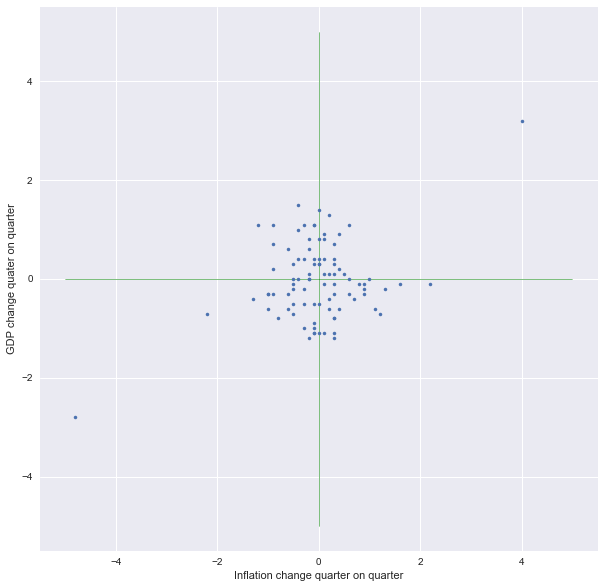

In [21]:
##### How I defined the quadrant
##### Quadrant 1 - Growing GDP(y-axis) & growing inflation(x-axis)
##### Quadrant 2 - Growing GDP(y-axis) & falling inflation(x-axis)
##### Quadrant 3 - Falling is(y-axis) & falling inflation(x-axis)
##### Quadrant 4 - Falling is(y-axis) & growing inflation(x-axis)


plt.figure(figsize=(10, 10))
plt.plot([0,0],[-5,5], linewidth=0.5, color='green' )
plt.plot([-5,5],[0,0], linewidth=0.5, color='green' )
plt.plot(delta_change_CPI,delta_change_GDP,'.')
plt.xlabel('Inflation change quarter on quarter')
plt.ylabel('GDP change quater on quarter')

plt.show()

# Creating a DataFrame - 'data_point' to study the data points collected above 

# Data points here are all the ( delta inflation, delta GDP) points in between 1993 Q1 and 2015 Q4

In [22]:
data_point = pd.DataFrame()
data_point['Date'] = df_GDP['Date'][1:]
data_point['delta_change_CPI'] = delta_change_CPI
data_point['delta_change_GDP'] = delta_change_GDP
data_point['quadrant_number'] = np.zeros(len(delta_change_CPI))


In [23]:
#### for example: 'index_quadrant1' will give us a list of index of all the data points that fall into 1st quadrant  ( index is coming from 'data_point' DataFrame)
#### for example: 'Date_quadrant2' will give us a list of dates of all the data points that fall into 1st quadrant 

Date_quadrant1 = []
index_quadrant1 = []

Date_quadrant2 = []
index_quadrant2 = []

Date_quadrant3 = []
index_quadrant3 = []

Date_quadrant4 = []
index_quadrant4 = []


In [24]:

for i in range(len(delta_change_CPI)):
    
    if data_point.iloc[i,1]>=0 and data_point.iloc[i,2]>=0:
        
        Date_quadrant1.append(data_point['Date'][i+1])
        index_quadrant1.append(i+1)
        
        
    elif data_point.iloc[i,1]<0 and data_point.iloc[i,2]>=0:
        Date_quadrant2.append(data_point['Date'][i+1])    
        index_quadrant2.append(i+1)
        
        
    elif data_point.iloc[i,1]<0 and data_point.iloc[i,2]<0:
        Date_quadrant3.append(data_point['Date'][i+1])    
        index_quadrant3.append(i+1)
        
        
    else:
        Date_quadrant4.append(data_point['Date'][i+1])
        index_quadrant4.append(i+1)
        
        
        

In [25]:
for i in index_quadrant1:
    data_point.loc[i,'quadrant_number'] = int(1)

for i in index_quadrant2:
    data_point.loc[i,'quadrant_number'] = int(2)
    
for i in index_quadrant3:
    data_point.loc[i,'quadrant_number'] = int(3)
    
for i in index_quadrant4:
    data_point.loc[i,'quadrant_number'] = int(4)

In [26]:
data_point['previous_quadrant'] = np.zeros(len(data_point))
data_point['next_quadrant'] = np.zeros(len(data_point))

In [27]:
warnings.filterwarnings('ignore') 
data_point['previous_quadrant'][1] = 'data_not_available'
data_point['next_quadrant'][len(data_point)] = 'data_not_available'


In [28]:
warnings.filterwarnings('ignore') 
for i in data_point.index[1:]:
        data_point['previous_quadrant'][i] = data_point['quadrant_number'][i-1]

for i in data_point.index[:-1]:
        data_point['next_quadrant'][i] = data_point['quadrant_number'][i+1]  
                

In [ ]:
# data_point

In [29]:
data_point['USD returns'] = df_USD['price'].pct_change()[1:]*100
data_point['gold returns'] = df_gold['price'].pct_change()[1:]*100
data_point['equity returns'] = df_equity['price'].pct_change()[1:]*100
data_point['bonds returns'] = -df_bonds['price'].pct_change()[1:]*100
data_point['commodities returns'] = df_commodities['price'].pct_change()[1:]*100
#data_point


In [30]:
data_point['Year'] = data_point.Date.str.slice(0, 4) ## Extract the year
data_point.head()


,Date,delta_change_CPI,delta_change_GDP,quadrant_number,previous_quadrant,next_quadrant,USD returns,gold returns,equity returns,bonds returns,commodities returns,Year
1,1993-Q2,-0.1,-0.5,3.0,data_not_available,3,1.893981,11.533923,-0.276625,4.116866,-7.467700,1993
2,1993-Q3,-0.3,-0.5,3.0,3,1,-0.843927,-6.003703,1.941748,6.821330,0.788432,1993
3,1993-Q4,0.0,0.3,1.0,3,2,4.330963,9.932470,1.428680,-7.655147,-7.782495,1993
4,1994-Q1,-0.2,0.8,2.0,1,1,-3.903346,0.076785,-4.292417,-16.292717,4.177025,1994
5,1994-Q2,0.0,0.8,1.0,2,1,-3.696540,-1.202046,-0.280308,-8.637578,5.691492,1994


## Create required dictionaries:

In [31]:
## Create dictionary with Assets available: 
asset_dic = ['USD' , 'gold' , 'equity' , 'bonds' , 'commodities']
asset_list = {key: value for (key, value) in zip(asset_dic, asset_dic)}

## Create a Dictionary of all the available timeperiods:
timeframe_dic = list(data_point.Year.unique())
timeframe_list = {key: value for (key, value) in zip(timeframe_dic, timeframe_dic)}


## Based on User Inputs, Select the Assets and Fields:

In [32]:
## Define functions for the widgets:

# Print Asset Selected:
def print_assets(Asset_Class):
    Asset_Class

# Timeframe Selection:
def print_time(Timeframe):
    Timeframe     
    
## Count of instances Selection:
def count_selection(count):
    count 
          
## Correlation view type selection -- Decide whether or not to display values on the correlation matrix:
def corr_selection(corr_vis):
    corr_vis 

    
    
    
#### Define the widgets:

# Asset Widget
assetW = SelectMultiple( options = asset_dic , value = [asset_dic[0]] )

# Timeframe Widget
timeframeW = SelectMultiple( options = timeframe_dic , value = [timeframe_dic[0]])

# Count of instances in quadrant/regime Widget
count_w = Checkbox( value = False , description = 'Include Count of Instances')

# Selection display type from corr_toggle_button Widget
corr_toggle_button = ToggleButtons( options = ['Yes', 'No'],
                                    value = 'No',
                                    description = 'Corr. values:',
                                    disabled = False,
                                    button_style = '', # 'success', 'info', 'warning', 'danger' or ''
                                    tooltips=['Show the correlation values'],
                                    # icons=['check'] * 3 
                                  )

## Calling widget functions:

asset_w_call = interactive( print_assets , Asset_Class = assetW )

timeframe_w_call = interactive( print_time , Timeframe = timeframeW )

count_w_call = interactive ( count_selection , count = count_w )

corr_toggle_call = interactive ( corr_selection , corr_vis = corr_toggle_button )




## Initialize the diplayed values into lists:

asset_w_call_list = [assetW.value]
timeframe_w_call_list = [timeframeW.value]
count_call_list = [count_w.value]
corr_toggle_call_list = [corr_toggle_button.options[1]]

## Functions to store the changes in the widget selections:
        
async def f_asset():
    for i in range(100):

        asset_w_call_val = await wait_for_change(assetW, 'value')
        asset_w_call_list.append(asset_w_call_val)
      
    
async def f_timeframe():
    for i in range(100):

        timeframe_w_call_val = await wait_for_change(timeframeW, 'value')
        timeframe_w_call_list.append(timeframe_w_call_val)
      
    
async def f_count():
    for i in range(100):

        count_call_val = await wait_for_change(count_w, 'value')
        count_call_list.append(count_call_val)
        
        
async def f_corr():
    for i in range(100):

        corr_toggle_call_val = await wait_for_change(corr_toggle_button, 'value')
        corr_toggle_call_list.append(corr_toggle_call_val)
        
        
## Capture the value changes in the widgets: 
asyncio.ensure_future(f_asset())
asyncio.ensure_future(f_timeframe())
asyncio.ensure_future(f_count())
asyncio.ensure_future(f_corr())


<Task pending coro=<f_corr() running at <ipython-input-32-2bcba32fffa0>:86>>

## Widget Container and Display:

In [33]:
## Place the Widgets in a container:
ui = VBox([
           
                    HBox([asset_w_call, timeframe_w_call]),
                     
                    HBox([corr_toggle_button , count_w_call])
          ])
         

## Display the widgets:
ui


## Run the cells below by clicking the following button:

In [246]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = Button(description = "Confirm Selection")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Confirm Selection', style=ButtonStyle())

## Store the user selections into variables:


In [247]:

## Store the selections made by the user:

selected_assets = asset_w_call_list[-1]
selected_timeframe = timeframe_w_call_list[-1]
selected_count = count_call_list[-1]
selected_corr_view = corr_toggle_call_list[-1]

#display(selected_assets, selected_timeframe, selected_count,selected_corr_view )



## Subset based on assets and timeframe:

In [248]:
selected_timeframe_list = list(selected_timeframe)
df_sub = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]

selected_assets_list = list(selected_assets)
selected_assets_list = [ i + ' returns' for i in selected_assets_list]
fields = ['Date' , 'Year' , 'delta_change_CPI' , 'delta_change_GDP'] + selected_assets_list

df_sub  >>= select (fields)
df_sub



,Date,Year,delta_change_CPI,delta_change_GDP,USD returns,gold returns,equity returns,bonds returns,commodities returns
1,1993-Q2,1993,-0.1,-0.5,1.893981,11.533923,-0.276625,4.116866,-7.467700
2,1993-Q3,1993,-0.3,-0.5,-0.843927,-6.003703,1.941748,6.821330,0.788432
3,1993-Q4,1993,0.0,0.3,4.330963,9.932470,1.428680,-7.655147,-7.782495
4,1994-Q1,1994,-0.2,0.8,-3.903346,0.076785,-4.292417,-16.292717,4.177025
5,1994-Q2,1994,0.0,0.8,-3.696540,-1.202046,-0.280308,-8.637578,5.691492
6,1994-Q3,1994,0.5,0.1,-1.941531,2.057986,3.829876,-3.866120,-4.813103
7,1994-Q4,1994,-0.3,-0.2,0.955849,-2.802790,-1.319850,-2.880442,5.449906
8,1995-Q1,1995,0.2,-0.6,-7.687106,2.139875,9.979479,8.003068,-0.939434
9,1995-Q2,1995,0.1,-1.1,-0.390720,-1.737353,8.575038,13.799333,-2.552668
10,1995-Q3,1995,-0.5,0.3,3.321893,-0.156006,7.495639,0.338546,3.778235



## Intuitive Correlation Matrix Plot Function:


In [249]:
## Intuitive Correlation Matrix Plot Funtion:

def my_heatmap( x , y , size , color , field_len , num_show ):
    
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = ( 350 / field_len ) ** 2
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    ax.scatter(
        x = x.map(x_to_num), # Use mapping for x
        y = y.map(y_to_num), # Use mapping for y
        s = size.abs() * size_scale, # Vector of square sizes, proportional to size parameter
        c = color.apply(value_to_color), # Vector of square colors, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major') # Turn off major gridlines
    ax.grid(True, 'minor') # Turn on minor gridlines
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    ## Displaying the numerical values:
    
    if num_show == 'Yes':
        
            size_disp = [round(i,2) for i in size]

            for i, txt in enumerate(size_disp):
                ax.annotate(txt , (x.map(x_to_num)[i] , y.map(y_to_num)[i]) , fontsize = 150 / field_len)

       
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = y[1] - y[0]
    ax.barh(
        y=y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 


## Create a Correlation Matrix based on the 'Returns' Columns for the selected assets:


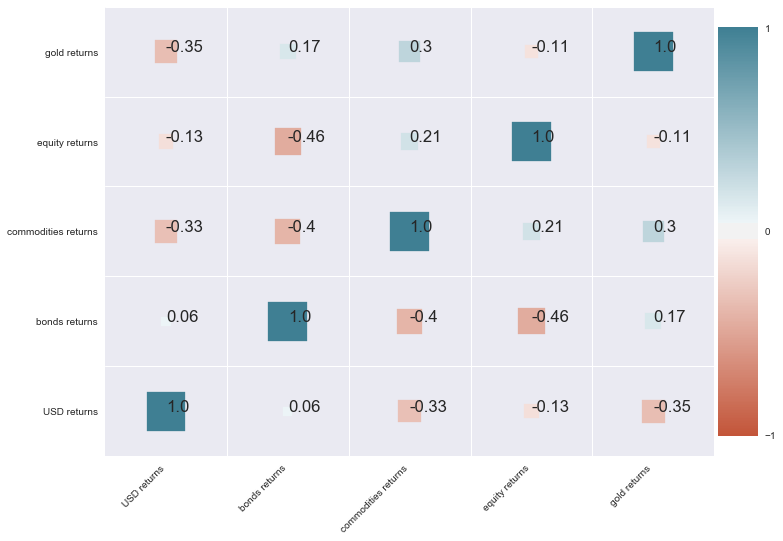

In [250]:
# Selected view type of the correlation matrix:

sns.set(rc={'figure.figsize':(11.7,8.27)})
corr_df = df_sub >> select (selected_assets_list) 
corr_df = corr_df.dropna()
corr_in = corr_df.corr()
corr = pd.melt(corr_in.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

corr_plot_store = my_heatmap(x = corr['x'],
                             y = corr['y'],
                             size = corr['value'],
                             color = corr['value'],
                             field_len = len(fields),
                             num_show = selected_corr_view)


## Chart to track Regime Change over time:

In [251]:

## Plotting the presence in regimes over time:  
plot_subset_list = ['Date' , 'quadrant_number']

df_plot = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]
df_plot >>= select (plot_subset_list) ## Subset the dataframe

q = df_plot['Date']
q = q.tolist()
r = df_plot['quadrant_number']
r = r.tolist()

fig, ax = plt.subplots()

line = plt.plot(q , r , marker = 'o' , linestyle = ':')

plt.xticks(rotation = 60)
ax.grid()
fig.set_size_inches(14 , 3.5)

plt.xlabel('Time'  , labelpad=5, fontsize=10)
plt.ylabel('Regime', labelpad=5, fontsize=10)
plt.title('Regime Changes over Time with GDP and PCE' , fontsize = 18)
plt.yticks([1 , 2 , 3 , 4] , fontsize = 18)
n = 7  # Keeps every 7th label in the x-axis
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.xticks( fontsize = .001)


#plt.show()
#plt.figure(figsize=(25,3))
mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip( line[0] , labels = q))
mpld3.display()



## Hierarchical Pie Chart

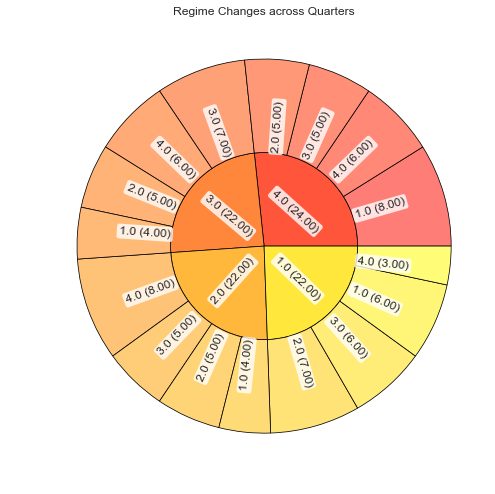

In [252]:

### Dataframe for quadrant after another, hpie:
## Use the same plotting Dataframe created before:
df_hpie = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]
df_hpie >>= select ( plot_subset_list + selected_assets_list ) ## Subset the dataframe

df_hpie.columns = ['Quarter' , 'Regime_lag_0'] + selected_assets_list
lvl_count = 2 ## Specify the numbers of qtrs we want to go back (including current) -- change later to widget input

## Preparatory:
for i in range(1, lvl_count + 1):
    curr_col = "Regime_lag_" + str(i)
    prev_col = "Regime_lag_" + str(i-1)
    df_hpie[curr_col] = df_hpie[prev_col].shift(-1)

df_hpie_out = pd.DataFrame() # Initialize an empty dataframe, reqd for the hierarchical pie chart
   
    
Regime_list = ["Regime_lag_" + str(j) for j in range( 0 , lvl_count )] # List of the regimes which fall in this

df_hpie_sub = df_hpie >> select(['Quarter'] + Regime_list)
df_hpie_piv = pd.pivot_table(df_hpie_sub , values = 'Quarter', index = Regime_list , aggfunc = 'count')
df_hpie_piv = df_hpie_piv.reset_index()

df_hpie_piv = df_hpie_piv[df_hpie_piv.columns[::-1]] ## Reverse the order of columns 

df_hpie_list = list(df_hpie_piv.columns[1:]) ## Create a list of the levels
df_hpie_piv = df_hpie_piv.astype(str)

df_hpie_piv['dictionary_key'] = df_hpie_piv[ df_hpie_list ].apply(lambda x: '/'.join(x), axis = 1) 
df_hpie_piv >>= select(X.dictionary_key , X.Quarter)
df_hpie_piv['Quarter'] = pd.to_numeric( df_hpie_piv['Quarter'] )

df_hpie_piv = df_hpie_piv.set_index('dictionary_key')

## Convert the dataframe output into a dictionary for input into the HPie Chart:
hpie_dict = df_hpie_piv.to_dict()    
hpie_dict = list(hpie_dict.values())
hpie_dict = hpie_dict[0]


## Create Asset wise pivots, to display the average returns in individual hpie charts:

for i in selected_assets_list:
    
    df_asset_sub = df_hpie >> select(['Quarter'] + Regime_list + [i])
    df_asset_sub = df_asset_sub.dropna()
    df_asset_piv = pd.pivot_table(df_asset_sub , values = i, index = Regime_list + ['Quarter'], aggfunc = np.sum)
    df_asset_piv = df_asset_piv.reset_index()
    df_asset_piv = df_asset_piv.drop(columns = ['Quarter'])
    
    df_asset_piv = df_asset_piv[df_asset_piv.columns[::-1]] ## Reverse the order of columns 

    df_asset_list = list(df_asset_piv.columns[1:]) ## Create a list of the levels
    df_asset_piv = df_asset_piv.astype(str)
    
    df_asset_piv['dictionary_key'] = df_asset_piv[ df_asset_list ].apply(lambda x: '/'.join(x), axis = 1) 
    df_asset_piv['dictionary_key'] = df_asset_piv['dictionary_key'].astype(str) + '/_' 
    
    df_asset_piv = df_asset_piv.drop(columns = df_asset_list)
    
    df_asset_piv[i] = pd.to_numeric( df_asset_piv[i] , downcast='float')
        
    df_asset_piv.rename(columns={i:'_t'} , inplace = True)
    df_asset_piv >>= group_by( X.dictionary_key ) >> summarize( mean_ = X._t.mean() )
    df_asset_piv['mean_'] = np.round( df_asset_piv['mean_'] , 2)
    
    df_asset_piv = df_asset_piv.set_index('dictionary_key')
    
    hpie_asset_dict = df_asset_piv.to_dict()
    hpie_asset_dict = list(hpie_asset_dict.values())
    hpie_asset_dict = hpie_asset_dict[0]
    hpie_asset_dict.update(hpie_dict)
    
    
#     fig, ax = plt.subplots()
#     data = stringvalues_to_pv(hpie_asset_dict)
#     hp = HPie( data , ax )

#     # set plot attributes

#     hp.plot(setup_axes = True )
#     ax.set_title('Regime Changes across Quarters - ' + i)

#     # save/show plot

#     plt.show()
    
#     #cdisplay(hpie_asset_dict)


## Overall:  
   
fig, ax = plt.subplots()

data = stringvalues_to_pv(hpie_dict)

hp = HPie( data , ax )

# set plot attributes

hp.plot(setup_axes = True)
ax.set_title('Regime Changes across Quarters')

# save/show plot

plt.show()

# Creating a data frame - ' returns_data' 

# returns_data will help you look into the average returns of all the asset classes when they are falling into a particular regime

In [253]:
###### below are the returns of all the data points that fall into a particular quadrant --- 

##### for example --- gold_returns_1 will give all gold returns of all the data points that fall into 1st quadrant

gold_returns_1 = []
bond_returns_1 =[]
equity_returns_1 =[]
USD_returns_1 =[]
commodities_returns_1 =[]

gold_returns_2 = []
bond_returns_2 =[]
equity_returns_2 =[]
USD_returns_2 =[]
commodities_returns_2 =[]

gold_returns_3 = []
bond_returns_3 =[]
equity_returns_3 =[]
USD_returns_3 =[]
commodities_returns_3 =[]
    
gold_returns_4 = []
bond_returns_4 =[]
equity_returns_4 =[]
USD_returns_4 =[]
commodities_returns_4 =[]


for i in index_quadrant1:
    gold_returns_1.append(data_point['gold returns'][i])
    bond_returns_1.append(data_point['bonds returns'][i])
    equity_returns_1.append(data_point['equity returns'][i])
    USD_returns_1.append(data_point['USD returns'][i])
    commodities_returns_1.append(data_point['commodities returns'][i])

    
for i in index_quadrant2:
    gold_returns_2.append(data_point['gold returns'][i])
    bond_returns_2.append(data_point['bonds returns'][i])
    equity_returns_2.append(data_point['equity returns'][i])
    USD_returns_2.append(data_point['USD returns'][i])
    commodities_returns_2.append(data_point['commodities returns'][i])

for i in index_quadrant3:
    gold_returns_3.append(data_point['gold returns'][i])
    bond_returns_3.append(data_point['bonds returns'][i])
    equity_returns_3.append(data_point['equity returns'][i])
    USD_returns_3.append(data_point['USD returns'][i])
    commodities_returns_3.append(data_point['commodities returns'][i])

    
for i in index_quadrant4:
    gold_returns_4.append(data_point['gold returns'][i])
    bond_returns_4.append(data_point['bonds returns'][i])
    equity_returns_4.append(data_point['equity returns'][i])
    USD_returns_4.append(data_point['USD returns'][i])
    commodities_returns_4.append(data_point['commodities returns'][i])

    
####### for example: avg_gold_1 will give us the average of all gold returns that fall into 1st quadrant   

avg_gold_1 = mean(np.array(gold_returns_1))
avg_bond_1 = mean(np.array(bond_returns_1))
avg_equity_1 = mean(np.array(equity_returns_1))   
avg_USD_1 = mean(np.array(USD_returns_1))   
avg_commodities_1 = mean(np.array(commodities_returns_1))  

avg_gold_2 = mean(np.array(gold_returns_2))   
avg_bond_2 = mean(np.array(bond_returns_2))   
avg_equity_2 = mean(np.array(equity_returns_2))   
avg_USD_2 = mean(np.array(USD_returns_1))   
avg_commodities_2 = mean(np.array(commodities_returns_2))

avg_gold_3 = mean(np.array(gold_returns_3))  
avg_bond_3 = mean(np.array(bond_returns_3))   
avg_equity_3 = mean(np.array(equity_returns_3))   
avg_USD_3 = mean(np.array(USD_returns_3))   
avg_commodities_3 = mean(np.array(commodities_returns_3))  

avg_gold_4 = mean(np.array(gold_returns_4))   
avg_bond_4 = mean(np.array(bond_returns_4))  
avg_equity_4 = mean(np.array(equity_returns_4))   
avg_USD_4 = mean(np.array(USD_returns_4))
avg_commodities_4 = mean(np.array(commodities_returns_4))


In [254]:

return_data = pd.DataFrame(index=['Quadrant 1','Quadrant 2','Quadrant 3', 'Quadrant 4'])


return_data['average_gold_retuns'] = [ avg_gold_1,avg_gold_2,avg_gold_3,avg_gold_4]
return_data['max gold return'] = [max(gold_returns_1),max(gold_returns_2),max(gold_returns_3),max(gold_returns_4)]
return_data['min gold return'] = [min(gold_returns_1),min(gold_returns_2),min(gold_returns_3),min(gold_returns_4)]
return_data['average_bond_retuns'] = [ avg_bond_1,avg_bond_2,avg_bond_3,avg_bond_4]
return_data['max bond return'] = [max(bond_returns_1),max(bond_returns_2),max(bond_returns_3),max(bond_returns_4)]
return_data['min bond return'] = [min(bond_returns_1),min(bond_returns_2),min(bond_returns_3),min(bond_returns_4)]
return_data['average_equity_retuns'] = [ avg_equity_1,avg_equity_2,avg_equity_3,avg_equity_4]
return_data['max equity return'] = [max(equity_returns_1),max(equity_returns_2),max(equity_returns_3),max(equity_returns_4)]
return_data['min equity return'] = [min(equity_returns_1),min(equity_returns_2),min(equity_returns_3),min(equity_returns_4)]
return_data['average_USD_retuns'] = [ avg_USD_1,avg_USD_2,avg_USD_3,avg_USD_4]
return_data['max USD return'] = [max(USD_returns_1),max(USD_returns_2),max(USD_returns_3),max(USD_returns_4)]
return_data['min USD return'] = [min(USD_returns_1),min(USD_returns_2),min(USD_returns_3),min(USD_returns_4)]
return_data['average_commodities_retuns'] = [ avg_commodities_1,avg_commodities_2,avg_commodities_3,avg_commodities_4]
return_data['max commodities return'] = [max(commodities_returns_1),max(commodities_returns_2),max(commodities_returns_3),max(commodities_returns_4)]
return_data['min commodities return'] = [min(commodities_returns_1),min(commodities_returns_2),min(commodities_returns_3),min(commodities_returns_4)]


# return_data

In [255]:
date_quad_1 =[]
date_quad_2 =[]
date_quad_3 =[]
date_quad_4 =[]

for i in index_quadrant1:
    
    date_quad_1.append(data_point['Date'][i])

for i in index_quadrant2:
    
    date_quad_2.append(data_point['Date'][i])

for i in index_quadrant3:
    
    date_quad_3.append(data_point['Date'][i])
    
for i in index_quadrant4:
    
    date_quad_4.append(data_point['Date'][i])
    
    
quadrant_1_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_1)

quadrant_1_returns['gold'] = gold_returns_1
quadrant_1_returns['bond'] = bond_returns_1
quadrant_1_returns['equity'] = equity_returns_1
quadrant_1_returns['USD'] = USD_returns_1
quadrant_1_returns['commodities'] = commodities_returns_1


quadrant_2_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_2)

quadrant_2_returns['gold'] = gold_returns_2
quadrant_2_returns['bond'] = bond_returns_2
quadrant_2_returns['equity'] = equity_returns_2
quadrant_2_returns['USD'] = USD_returns_2
quadrant_2_returns['commodities'] = commodities_returns_2


quadrant_3_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_3)

quadrant_3_returns['gold'] = gold_returns_3
quadrant_3_returns['bond'] = bond_returns_3
quadrant_3_returns['equity'] = equity_returns_3
quadrant_3_returns['USD'] = USD_returns_3
quadrant_3_returns['commodities'] = commodities_returns_3


quadrant_4_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_4)

quadrant_4_returns['gold'] = gold_returns_4
quadrant_4_returns['bond'] = bond_returns_4
quadrant_4_returns['equity'] = equity_returns_4
quadrant_4_returns['USD'] = USD_returns_4
quadrant_4_returns['commodities'] = commodities_returns_4


# quadrant_1_returns
# quadrant_2_returns
# quadrant_3_returns
# quadrant_4_returns

# Using 3 Optimisation methods to calculate optimum weights of Asset classes

In [256]:
##### monte_carlo method for obtaining optimum weights

optimum_weights_monte_carlo = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

weights_each_quadrant =[]

def monte_carlo_optimization(Data):
    
   
    #calculate the return of the asset classses

    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

   

   #create the dataframe of the return of the asset classes
    AssetClass=pd.DataFrame()
    AssetClass['equity']=Equity_return
    AssetClass['bond']=T_return
    AssetClass['USD']=USD_return
    AssetClass['gold']=Gold_return
    AssetClass['commodities']=commodities_return
    AssetClass.dropna(inplace=True)
   
    
    mean_return=AssetClass.mean()           
   #print("Mean Return of Portfolios")
   #print(mean_return)
   
    
   #covraince matrix
   #print("----------------------------------------------------")
    cov_matrix=AssetClass.cov()                    
   #print("Covariance Matrix of the Portfolios")
   #print(cov_matrix)

    number_port=len(AssetClass.columns)
    V=np.matrix(cov_matrix)
    R=np.matrix(mean_return)
    Rf=0.0013 #Risk-free rate
   
    Port_Std=[]
    Port_MeanReturn=[]
    Sharpe_Ratio=[]
    weight=[]
    
    for i in range(10000):
        
        w = np.random.uniform(0,1,size=number_port)
       #w=np.random.normal(size=number_port)
        w /= w.sum()
        weight.append(w) #portfolio weight
       #Portfolio Standard Deviation
        Port_Var=np.asscalar(w*np.matrix(V)*w.reshape(number_port,1))
        Port_Std.append(np.sqrt(Port_Var))
       #Portfolio Mean Return
        meanReturn=np.asscalar(np.matmul(R,np.matrix(w).transpose()))
        Port_MeanReturn.append(meanReturn)
       #Sharpe Ratio
        Sharpe_Ratio.append((meanReturn-Rf)/np.sqrt(Port_Var))

        num=Sharpe_Ratio.index(max(Sharpe_Ratio)) #the index of the lagest sharpe ratio
        w_tan=weight[num]
        
    weights_each_quadrant.append(w_tan)
    print("======================================================")
    print("The weight of the tangency portfolio is")
    print(w_tan)
   
    print("======================================================")
    print("The return of the tangency portfolio is")
    print(Port_MeanReturn[num]*4)
   
    print("======================================================")
    print("The Sharpe ratio of the tangency portfolio is")
    print(max(Sharpe_Ratio))

    fig5=plt.figure()
    ax5=fig5.add_subplot(111)
    ax5.plot(Port_Std,Port_MeanReturn,'.')
    ax5.set_title("minimum-variance frontier")
    ax5.set_xlabel("Standard Deviation")
    ax5.set_ylabel("Return") 
    #ax5.set_xlim([0.018,0.1])
    #ax5.set_ylim([-0.1,0.1])
    
    

    



The weight of the tangency portfolio is
[0.33961846 0.01364303 0.163861   0.26112945 0.22174805]
The return of the tangency portfolio is
13.449711216028732
The Sharpe ratio of the tangency portfolio is
1.2850202452157127
The weight of the tangency portfolio is
[0.24130199 0.18334899 0.1357853  0.20540153 0.23416219]
The return of the tangency portfolio is
9.529438371099701
The Sharpe ratio of the tangency portfolio is
0.9182051346073088
The weight of the tangency portfolio is
[0.1069488  0.24527201 0.63150712 0.01443802 0.00183404]
The return of the tangency portfolio is
8.122561177185482
The Sharpe ratio of the tangency portfolio is
0.48034138736438403
The weight of the tangency portfolio is
[0.67764638 0.04493372 0.06939233 0.03298364 0.17504393]
The return of the tangency portfolio is
9.254179626797683
The Sharpe ratio of the tangency portfolio is
0.5867345793454474


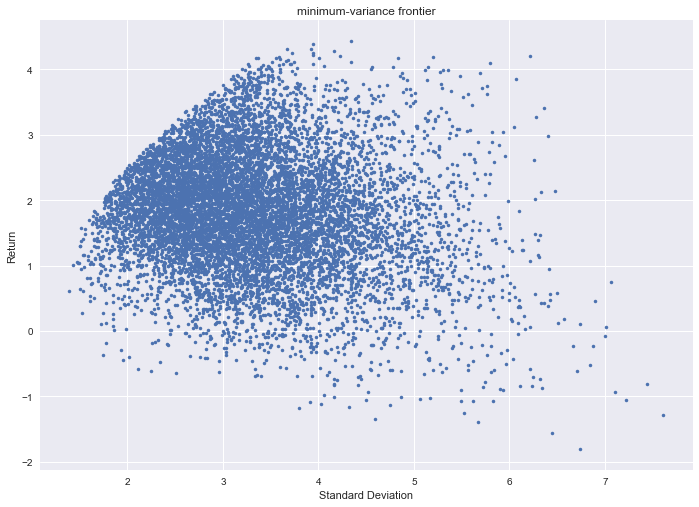

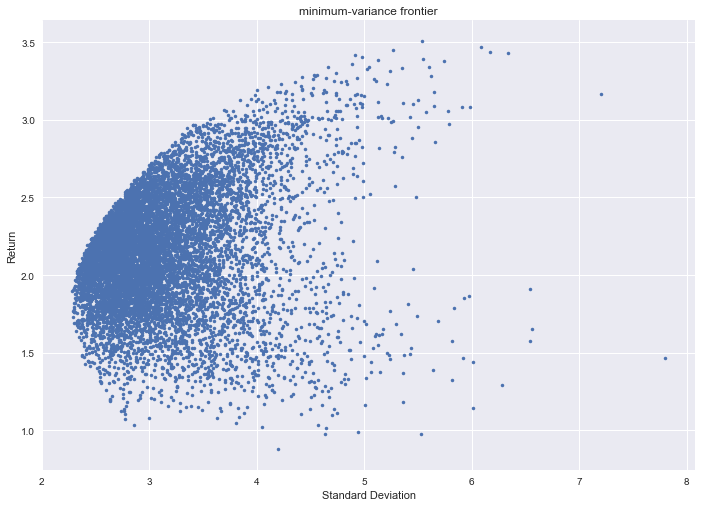

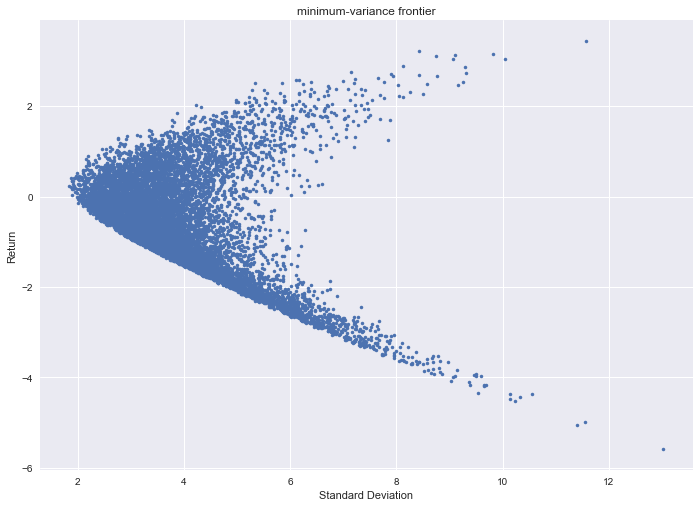

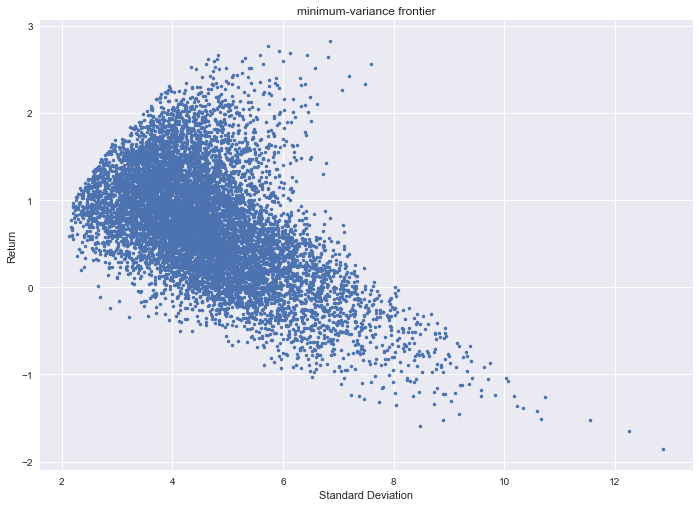

In [257]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4


for i in range(4):
    
    
    monte_carlo_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])  
    
    optimum_weights_monte_carlo[optimum_weights_monte_carlo.columns[i]] = weights_each_quadrant[i]   
    
    

In [258]:
# optimum_weights_monte_carlo

In [259]:
##### risk parity method for obtaining optimum weights

optimum_weights_rp = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

weights_each_quadrant_rp =[]

def risk_parity_optimization(Data):
    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

   

   #create the dataframe of the return of the asset classes
    AssetClass=pd.DataFrame()
    AssetClass['equity']=Equity_return
    AssetClass['bond']=T_return
    AssetClass['USD']=USD_return
    AssetClass['gold']=Gold_return
    AssetClass['commodities']=commodities_return
     

    AssetClass.dropna(inplace=True)

    cov_matrix=AssetClass.cov() 
    V=np.matrix(cov_matrix)

    # risk budgeting optimization
    def calculate_portfolio_var(w,V):
        # function that calculates portfolio risk
        w = np.matrix(w)
        return (w*V*w.T)[0,0]

    def calculate_risk_contribution(w,V):
        # function that calculates asset contribution to total risk
        w = np.matrix(w)
        sigma = np.sqrt(calculate_portfolio_var(w,V))
        # Marginal Risk Contribution
        MRC = V*w.T
        # Risk Contribution
        RC = np.multiply(MRC,w.T)/sigma
        return RC

    def risk_budget_objective(x,pars):
        # calculate portfolio risk
        V = pars[0]# covariance table
        x_t = pars[1] # risk target in percent of portfolio risk
        sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
        risk_target = np.asmatrix(np.multiply(sig_p,x_t))
        asset_RC = calculate_risk_contribution(x,V)
        J = sum(np.square(asset_RC-risk_target.T))[0,0]*1000 # sum of squared error
        return J

    def total_weight_constraint(x):
        return np.sum(x)-1.0

    def long_only_constraint(x):
        return x

    x_t = [0.2, 0.2, 0.2, 0.2,0.2] # your risk budget percent of total portfolio risk (equal risk)
    w0 = [0.2,0.2,0.2,0.2,0.2] 
    cons = ({'type': 'eq', 'fun': total_weight_constraint},
    {'type': 'ineq', 'fun': long_only_constraint})
    res= minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
    w_rb = np.asmatrix(res.x)

    #caculate the mean return of the asset classes
    USD_MeanReturn=np.mean(USD_return)
    Gold_MeanReturn=np.mean(Gold_return)
    Equity_MeanReturn=np.mean(Equity_return)
    T_MeanReturn=np.mean(T_return)
    commodities_meanreturn = np.mean(commodities_return)

    #return of the portfolio
    R=USD_MeanReturn*res.x[0]+Gold_MeanReturn*res.x[1]+Equity_MeanReturn*res.x[2]+T_MeanReturn*res.x[3]+commodities_meanreturn*res.x[4]
    print("Aunnual Return of the portfolio is",R*4)

    print(w_rb)
    
    w_rb_list = w_rb.tolist()
    weights_each_quadrant_rp.append(w_rb_list)




In [260]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

for i in range(4):
    
    risk_parity_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])
    
    optimum_weights_rp[optimum_weights_rp.columns[i]] = weights_each_quadrant_rp[0][0][i] 
    
    

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 513.8759424650466
            Iterations: 21
            Function evaluations: 165
            Gradient evaluations: 18
Aunnual Return of the portfolio is 2.6351990604833184
[[3.72908320e-01 1.62216480e-01 3.31718349e-07 2.30823529e-01
  2.34051339e-01]]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.3850913815807057e-10
            Iterations: 10
            Function evaluations: 83
            Gradient evaluations: 10
Aunnual Return of the portfolio is 8.79414936409227
[[0.1742325  0.16359111 0.2532807  0.23697502 0.17192069]]
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 668.3219337520349
            Iterations: 33
            Function evaluations: 307
            Gradient evaluations: 29
Aunnual Return of the portfolio is 4.063734743129194
[[ 3.43303033e-01  2.40637472e-01 -2.89472697e-13  2.84

In [261]:
# optimum_weights_rp

In [262]:
##### inverse vol method for obtaining optimum weights

optimum_weights_iv = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

weights_each_quadrant_iv =[]

def inverse_vol_optimization(Data):
    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

    
    #volatility of each asset
    
    Equity_vol=np.std(Equity_return)
    USD_vol=np.std(USD_return)
    T_vol=np.std(T_return)
    Gold_vol=np.std(Gold_return)
    commodities_vol=np.std(commodities_return)
    
    vol=np.array([Equity_vol,USD_vol,T_vol,Gold_vol,commodities_vol])

    #inverse the vol
    inverse_vol=1/vol
    sum_vol=np.sum(inverse_vol)
    #the portfolio weight
    port_weight=inverse_vol/sum_vol

    #to test whether the sum of the weight is equal to 1
    if np.sum(port_weight)==1:
        print('True')

    #caculate the mean return of the asset classes
    USD_MeanReturn=np.mean(USD_return)
    Gold_MeanReturn=np.mean(Gold_return)
    Equity_MeanReturn=np.mean(Equity_return)
    T_MeanReturn=np.mean(T_return)
    commodities_meanreturn=np.mean(commodities_return)
    

    #return of the portfolio
    R=commodities_meanreturn*port_weight[-1]+USD_MeanReturn*port_weight[1]+Gold_MeanReturn*port_weight[3]+Equity_MeanReturn*port_weight[0]+T_MeanReturn*port_weight[2]
   
    print("Aunnual Return of the portfolio is",R*4)

    print(port_weight)
    
    weights_each_quadrant_iv.append(port_weight)
    
    



In [263]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

for i in range(4):
    
    inverse_vol_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])
    
    optimum_weights_iv[optimum_weights_iv.columns[i]] = weights_each_quadrant_iv[i] 

True
Aunnual Return of the portfolio is 5.173180862198192
[0.15835966 0.40774106 0.11518244 0.18322699 0.13548985]
True
Aunnual Return of the portfolio is 7.6088111506703555
[0.15555113 0.28511119 0.13191773 0.26918216 0.15823779]
Aunnual Return of the portfolio is -0.6691848112431673
[0.18710622 0.3614383  0.10353483 0.24421185 0.1037088 ]
True
Aunnual Return of the portfolio is 3.3606470283626586
[0.24088096 0.36429014 0.08213251 0.17990643 0.13278997]


In [264]:
# optimum_weights_iv

In [265]:


####Write the output to Excel   


writer = pd.ExcelWriter('return_output.xlsx') 


optimum_weights_monte_carlo.to_excel(writer,'monte carlo') 




optimum_weights_iv.to_excel(writer,'inverse vol') 

 

optimum_weights_rp.to_excel(writer,'risk parity') 

 

writer.save()  

 




In [266]:
mom = ['1_1','2_1','3_1','4_1', '1_2','2_2','3_2','4_2', '1_3','2_3','3_3','4_3', '1_4','2_4','3_4','4_4']

##### index_i_j ---- this is the list of all the index of data points in 'data_point' DataFrame ---
##### 'i' is from what quadrant you are coming from  ---- 'j' is your current quadrant

for i in mom:
    vars()['index_'+ i] = []
        
for i in index_quadrant1:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_1.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_1.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_1.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_1.append(i)
        
        
for i in index_quadrant2:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_2.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_2.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_2.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_2.append(i)    
        
for i in index_quadrant3:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_3.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_3.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_3.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_3.append(i)        
        
for i in index_quadrant4:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_4.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_4.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_4.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_4.append(i)        
            

In [267]:
#### below data frame gives average return of each asset for a particular type of regime change

momentum_df = pd.DataFrame(index = mom, columns = ['gold', 'equity', 'bonds', 'commodities','USD'])

for p in mom:
    
    L = vars()['index_'+ p]
    
    momentum_df['gold'][p] = mean(np.array([data_point['gold returns'][i] for i in L]))
    momentum_df['equity'][p] = mean(np.array([ data_point['equity returns'][i] for i in L ]))
    momentum_df['bonds'][p] = mean(np.array([ data_point['bonds returns'][i] for i in L ]))
    momentum_df['USD'][p] = mean(np.array([ data_point['USD returns'][i] for i in L ]))
    momentum_df['commodities'][p] = mean(np.array([ data_point['commodities returns'][i] for i in L]))  

In [268]:
momentum_df

,gold,equity,bonds,commodities,USD
1_1,0.0266269,6.17584,-5.21086,2.42792,0.809384
2_1,2.88686,3.98058,0.895511,3.72409,-2.98427
3_1,8.31266,4.88494,-4.81204,6.47566,-0.918336
4_1,6.4468,1.28174,-2.77126,6.67012,-0.839953
1_2,0.0980253,3.17417,-5.55773,1.10811,0.389904
2_2,4.97858,-0.933076,6.48652,3.63818,-0.722168
3_2,0.594695,8.25246,1.34502,1.25768,3.48828
4_2,0.729262,3.53632,1.10224,7.22739,-0.396842
1_3,-4.65703,-2.46694,-3.58735,-8.97845,4.46934
2_3,-4.67787,0.744984,12.1415,-10.6695,4.59225


# Data required for Validation - 2016 Q1 to 2018 Q4

In [269]:
df_USD = pd.read_excel("Data.xlsx", header = None,sheet_name = 'USD')
df_gold = pd.read_excel("Data.xlsx", header = None,sheet_name = 'gold')
df_equity = pd.read_excel("Data.xlsx", header = None,sheet_name = 'equity')
df_bonds = pd.read_excel("Data.xlsx", header = None,sheet_name = 'bonds')
df_commodities = pd.read_excel("Data.xlsx", header = None,sheet_name = 'commodities')
df_GDP = pd.read_excel("Data.xlsx", header = None,sheet_name = 'GDP')
df_CPI = pd.read_excel("Data.xlsx", header = None,sheet_name = 'CPI')

df_USD.columns = ['Date','price']
df_gold.columns = ['Date','price']
df_equity.columns = ['Date','price']
df_bonds.columns = ['Date','price']
df_commodities.columns = ['Date','price']
df_GDP.columns = ['Date','return']
df_CPI.columns = ['Date','return']

Last_date = '2015-10-01 00:00:00'

index_for_Last_date_testing = 91

df_USD_validation = df_USD.loc[index_for_Last_date_testing+1:,:]
df_gold_validation = df_gold.loc[index_for_Last_date_testing+1:,:]
df_equity_validation = df_equity.loc[index_for_Last_date_testing+1:,:]
df_bonds_validation = df_bonds.loc[index_for_Last_date_testing+1:,:]
df_commodities_validation = df_commodities.loc[index_for_Last_date_testing+1:,:]
df_GDP_validation = df_GDP.loc[index_for_Last_date_testing+1:,:]
df_CPI_validation = df_CPI.loc[index_for_Last_date_testing+1:,:]

# df_GDP_validation

In [270]:

####below list contains change in GDP values quarter on quarter 
delta_change_GDP_test = [df_GDP_validation.iloc[i+1,1] - df_GDP_validation.iloc[i,1] for i in range(len(df_GDP_validation)-1)]


####below list contains change in CPI values quarter on quarter 
delta_change_CPI_test = [df_CPI_validation.iloc[i+1,1] - df_CPI_validation.iloc[i,1] for i in range(len(df_GDP_validation)-1)]

# df_GDP_validation

In [271]:
data_point_val = pd.DataFrame()
data_point_val['Date'] = df_GDP_validation.loc[93:,'Date']
data_point_val['delta_change_CPI'] = delta_change_CPI_test
data_point_val['delta_change_GDP'] = delta_change_GDP_test
data_point_val['quadrant_number'] = np.zeros(len(delta_change_CPI_test))

data_point_val

,Date,delta_change_CPI,delta_change_GDP,quadrant_number
93,2016-Q2,0.1,-0.3,0.0
94,2016-Q3,0.5,0.2,0.0
95,2016-Q4,0.6,0.4,0.0
96,2017-Q1,0.3,0.0,0.0
97,2017-Q2,-0.8,0.2,0.0
98,2017-Q3,0.6,0.2,0.0
99,2017-Q4,-0.1,0.2,0.0
100,2018-Q1,0.3,0.1,0.0
101,2018-Q2,0.5,0.3,0.0
102,2018-Q3,-0.6,0.1,0.0


In [272]:
#### for example: 'index_quadrant1' will give us a list of index of all the data points that fall into 1st quadrant  ( index is coming from 'data_point' DataFrame)
#### for example: 'Date_quadrant2' will give us a list of dates of all the data points that fall into 1st quadrant 

index_quadrant1_test= []

index_quadrant2_test = []

index_quadrant3_test = []

index_quadrant4_test = []


In [273]:

for i in range(len(delta_change_CPI_test)):
    
    if data_point_val.iloc[i,1]>=0 and data_point_val.iloc[i,2]>=0:    
        
        index_quadrant1_test.append(i)
        
        
    elif data_point_val.iloc[i,1]<0 and data_point_val.iloc[i,2]>=0:
           
        index_quadrant2_test.append(i)
        
        
    elif data_point_val.iloc[i,1]<0 and data_point_val.iloc[i,2]<0:
           
        index_quadrant3_test.append(i)
               
    else:
       
        index_quadrant4_test.append(i)
        
   #### note that the index you append here is 0,1,2, so on .. 0 means 1st row and 1 means 2nd row -- so use 'iloc' to call rows     
        

In [274]:
data_point_val['quadrant_number'] = np.nan 


for i in index_quadrant1_test:
    
    data_point_val.iloc[i,3] = 1

for i in index_quadrant2_test:
    
    data_point_val.iloc[i,3] = 2
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,3]= 3
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,3] = 4

In [275]:
data_point_val['previous_quadrant'] = np.zeros(len(data_point_val))
data_point_val['next_quadrant'] = np.zeros(len(data_point_val))



In [276]:
warnings.filterwarnings('ignore') 
data_point_val['previous_quadrant'][93] = 'data_not_available'
data_point_val['next_quadrant'][103] = 'data_not_available'

# data_point_val

In [277]:
warnings.filterwarnings('ignore') 

for i in data_point_val.index[1:]:
    
    data_point_val['previous_quadrant'][i] = data_point_val['quadrant_number'][i-1]

for i in data_point_val.index[:-1]:
    
    data_point_val['next_quadrant'][i] = data_point_val['quadrant_number'][i+1]  
  

In [278]:
data_point_val['USD returns'] = df_USD_validation['price'].pct_change()[1:]*100
data_point_val['gold returns'] = df_gold_validation['price'].pct_change()[1:]*100
data_point_val['equity returns'] = df_equity_validation['price'].pct_change()[1:]*100
data_point_val['bonds returns'] = -df_bonds_validation['price'].pct_change()[1:]*100
data_point_val['commodities returns'] = df_commodities_validation['price'].pct_change()[1:]*100
data_point_val

,Date,delta_change_CPI,delta_change_GDP,quadrant_number,previous_quadrant,next_quadrant,USD returns,gold returns,equity returns,bonds returns,commodities returns
93,2016-Q2,0.1,-0.3,4.0,data_not_available,1,1.646121,7.231799,1.924387,16.892655,15.649630
94,2016-Q3,0.5,0.2,1.0,4,1,-0.707280,-0.456162,3.258145,-8.429640,-2.556250
95,2016-Q4,0.6,0.4,1.0,1,1,7.067660,-12.795337,3.342580,-53.291536,9.255274
96,2017-Q1,0.3,0.0,1.0,1,2,-1.819783,8.862745,5.462354,2.331288,-2.506103
97,2017-Q2,-0.8,0.2,2.0,1,1,-4.705531,-0.607589,2.570629,3.475712,-4.081917
98,2017-Q3,0.6,0.2,1.0,2,2,-2.668674,3.071818,3.899917,-1.258134,7.232096
99,2017-Q4,-0.1,0.2,2.0,1,1,-1.022820,1.801133,6.221391,-3.084833,10.800555
100,2018-Q1,0.3,0.1,1.0,2,1,-2.333811,1.740866,-1.390242,-13.881962,2.373136
101,2018-Q2,0.5,0.3,1.0,1,2,4.996999,-5.498385,3.089493,-4.416058,7.617401
102,2018-Q3,-0.6,0.1,2.0,1,2,0.700752,-4.927351,7.166028,-7.025516,-0.237528


In [279]:
data_point_val['total_return_monte_carlo'] = np.nan

In [280]:
for i in index_quadrant1_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant1']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant2_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant2']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant3']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant4']['commodities']*data_point_val.iloc[i,10]
    
    
    

In [281]:
data_point_val['total_return_rp'] = np.nan

In [282]:
for i in index_quadrant1_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant1']['commodities']*data_point_val.iloc[i,10]
    
    

for i in index_quadrant2_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant2']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant3']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant4']['commodities']*data_point_val.iloc[i,10]
    
    
    

In [283]:

data_point_val

,Date,delta_change_CPI,delta_change_GDP,quadrant_number,previous_quadrant,next_quadrant,USD returns,gold returns,equity returns,bonds returns,commodities returns,total_return_monte_carlo,total_return_rp
93,2016-Q2,0.1,-0.3,4.0,data_not_available,1,1.646121,7.231799,1.924387,16.892655,15.649630,5.155236,10.004952
94,2016-Q3,0.5,0.2,1.0,4,1,-0.707280,-0.456162,3.258145,-8.429640,-2.556250,0.189664,-3.315597
95,2016-Q4,0.6,0.4,1.0,1,1,7.067660,-12.795337,3.342580,-53.291536,9.255274,0.277357,-17.310911
96,2017-Q1,0.3,0.0,1.0,1,2,-1.819783,8.862745,5.462354,2.331288,-2.506103,3.347331,4.598147
97,2017-Q2,-0.8,0.2,2.0,1,1,-4.705531,-0.607589,2.570629,3.475712,-4.081917,-0.462006,-0.543214
98,2017-Q3,0.6,0.2,1.0,2,2,-2.668674,3.071818,3.899917,-1.258134,7.232096,3.275873,3.832387
99,2017-Q4,-0.1,0.2,2.0,1,1,-1.022820,1.801133,6.221391,-3.084833,10.800555,3.695786,2.387085
100,2018-Q1,0.3,0.1,1.0,2,1,-2.333811,1.740866,-1.390242,-13.881962,2.373136,-0.063135,-5.031284
101,2018-Q2,0.5,0.3,1.0,1,2,4.996999,-5.498385,3.089493,-4.416058,7.617401,2.061167,2.158934
102,2018-Q3,-0.6,0.1,2.0,1,2,0.700752,-4.927351,7.166028,-7.025516,-0.237528,-0.531498,-0.701362


In [284]:
data_point_val['total_return_iv'] = np.nan

In [285]:
for i in index_quadrant1_test:
    
    data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant1']['commodities']*data_point_val.iloc[i,10]
    
    

for i in index_quadrant2_test:
    
    data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant2']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant3']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,13] = optimum_weights_rp['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant4']['commodities']*data_point_val.iloc[i,10]
    
    
    

In [286]:
data_point_val1 = 

SyntaxError: invalid syntax (<ipython-input-286-85a33495a3c6>, line 1)

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(data_point_val.index,data_point_val['total_return_monte_carlo'])
plt.title('monte carlo')

plt.subplot(2,2,2)
plt.plot(data_point_val.index,data_point_val['total_return_rp'])
plt.title('risk parity')

plt.subplot(2,2,3)
plt.plot(data_point_val.index,data_point_val['total_return_iv'])
plt.title('inverse vol')

plt.show()
